In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_empirical_cdf(data, xlabel="Wert", ylabel="Kumulative Häufigkeit", title="Empirische Verteilungsfunktion", yCoord=0.1):
    """
    Plots a minimalist empirical cumulative distribution function (ECDF) for a given dataset.
    Displays the y-value (cumulative probability) next to each point.

    Parameters
    ----------
    data : list or array-like
        The dataset for which the ECDF is computed and plotted.
    
    xlabel : str, optional
        Label for the x-axis. Defaults to "Wert".
    
    ylabel : str, optional
        Label for the y-axis. Defaults to "Kumulative Häufigkeit".
    
    title : str, optional
        Title of the plot. Defaults to "Empirische Verteilungsfunktion".
    
    Returns
    -------
    None
        The function creates and displays a plot of the empirical cumulative distribution function.
    """
    
    # Sortiere die Daten und berechne die kumulierten Häufigkeiten
    sorted_data = np.sort(data)
    n = len(data)
    cumulative_probs = np.arange(1, n + 1) / n  # Kumulative Häufigkeiten

    # Plotten der Daten:
    fig, axes = plt.subplots(figsize=(10, 6))
    
    sns.lineplot(
        x=sorted_data,
        y=cumulative_probs,
        drawstyle="steps-post",
        color="dodgerblue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.3,
        ax=axes
    )
    
    sns.scatterplot(
        x=sorted_data,
        y=cumulative_probs,
        color="dodgerblue",
        s=35,
        zorder=3,
        ax=axes
    )
    
    # Anzeige der y-Werte neben den Punkten
    for x, y in zip(sorted_data, cumulative_probs):
        axes.text(
            x=x,
            y=y+yCoord,
            s=f'{y:.2f}', 
            ha='left', va='center', 
            fontsize=9, color="black",
            alpha=0.8
        )
    
    # Achsenbeschriftungen und Titel
    axes.set_xlabel(xlabel, fontsize=11)
    axes.set_ylabel(ylabel, fontsize=11)
    axes.set_title(title, fontsize=13, weight='bold')
    axes.set_xlim(sorted_data.min() - 0.5, sorted_data.max() + 0.5)
    axes.grid(True, linestyle="--", alpha=0.7, axis="y")
    sns.despine()
    plt.tight_layout()

## 1. Beispiel

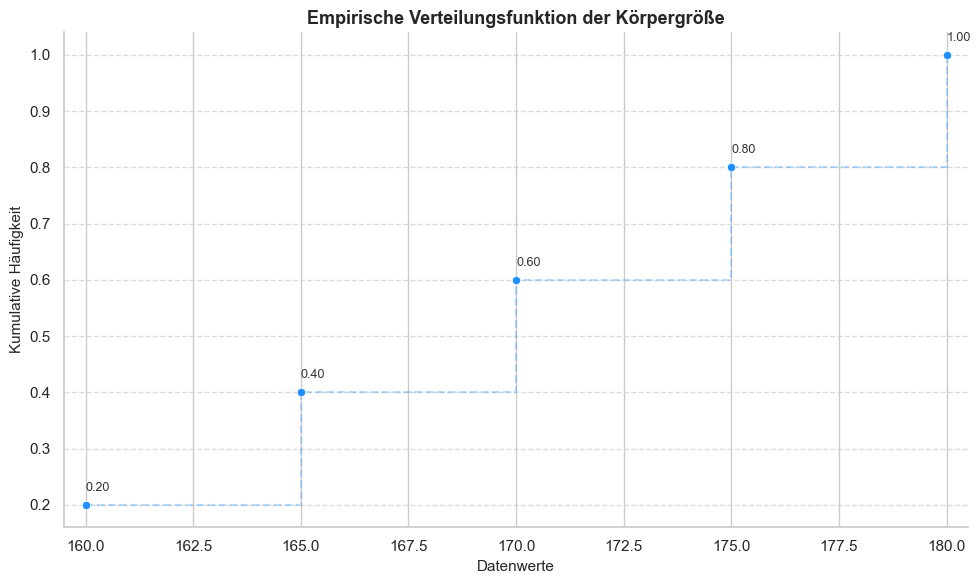

In [38]:
data = [160, 165, 170, 175, 180]
plot_empirical_cdf(data, xlabel="Datenwerte", ylabel="Kumulative Häufigkeit", title="Empirische Verteilungsfunktion der Körpergröße", yCoord=0.03)
